## Divide the dataset

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
generating_data_dir = "generating_data"
transactions_xgb = pd.read_csv(os.path.join(generating_data_dir,'transactions_xgb.csv'))

In [3]:
display(transactions_xgb)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,SME_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,CARD_NO,CARD_TYPE,EMAIL_DOMAIN,...,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,NB_CARD_NO,NB_CARD_TYPE,NB_EMAIL_DOMAIN,NB_IP_ADDRESS,NB_PHONE_NO
0,0,2018-04-01 00:00:17,6160,1602,31.83,17,0,4807386282223131022,VISA 16 digit,smith.com,...,0.0,0.0,0.0,0.0,0.000000,10,6,15,3,3
1,1,2018-04-01 00:01:59,3305,3563,66.21,119,0,501840408188,JCB 16 digit,yahoo.com,...,0.0,0.0,0.0,0.0,0.000000,5,3,17,2,7
2,2,2018-04-01 00:02:21,6170,3552,25.17,141,0,2404180621851474,JCB 15 digit,yahoo.com,...,0.0,0.0,0.0,0.0,0.000000,12,7,19,6,7
3,3,2018-04-01 00:03:45,8347,344,3.09,225,0,38977833740025,JCB 15 digit,gmail.com,...,0.0,0.0,0.0,0.0,0.000000,5,4,7,1,2
4,4,2018-04-01 00:07:56,2,3958,146.00,476,0,4934421761046,Diners Club / Carte Blanche,wiggins.com,...,0.0,0.0,0.0,0.0,0.000000,6,4,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781237,1773913,2018-09-30 23:56:56,1987,324,34.53,15811016,182,3528716375376223,JCB 16 digit,hughes.info,...,0.0,28.0,0.0,105.0,0.000000,10,6,11,8,5
1781238,1773914,2018-09-30 23:57:07,3133,3491,55.83,15811027,182,676151026702,American Express,yahoo.com,...,0.0,17.0,0.0,77.0,0.025974,10,6,15,3,9
1781239,1773915,2018-09-30 23:57:11,3007,3664,65.94,15811031,182,4264830832653,VISA 16 digit,torres.net,...,0.0,17.0,0.0,61.0,0.000000,15,7,20,4,3
1781240,1773916,2018-09-30 23:57:44,6244,3137,16.99,15811064,182,213165348311865,Maestro,gmail.com,...,0.0,11.0,0.0,63.0,0.000000,8,6,20,2,5


In [4]:
output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW', 'NB_CARD_NO', 'NB_CARD_TYPE', 'NB_EMAIL_DOMAIN', 'NB_IP_ADDRESS',
       'NB_PHONE_NO']

In [5]:
X_train = transactions_xgb[input_features].copy()
y_train = transactions_xgb[output_feature].copy()
cols = list(X_train.columns)

# extract out transactions for train, validation, and test data
train_data_ratio = 0.7 # fraction of data to use in training set
valid_data_ratio = 0.2 # fraction of data to use in validation set
n_train = int(transactions_xgb.shape[0]*train_data_ratio)
n_valid = int(transactions_xgb.shape[0]*(train_data_ratio+valid_data_ratio))
train_ids = transactions_xgb.index.values[:n_train]
valid_ids = transactions_xgb.index.values[n_train:n_valid]
test_ids = transactions_xgb.index.values[n_valid:]
idxT = X_train.index[:n_train]
idxV = X_train.index[n_train:n_valid]
idxP = X_train.index[n_valid:]

print("Training, validation, and test data fraction are {}, {}, and {:.1f}, respectively".format(train_data_ratio, valid_data_ratio, 1-train_data_ratio-valid_data_ratio))

get_fraud_frac = lambda series: 100 * sum(series)/len(series)
print("Percentage of fraud transactions for train data: {}".format(get_fraud_frac(transactions_xgb.TX_FRAUD[:n_train])))
print("Percentage of fraud transactions for validation data: {}".format(get_fraud_frac(transactions_xgb.TX_FRAUD[n_train:n_valid])))
print("Percentage of fraud transactions for test data: {}".format(get_fraud_frac(transactions_xgb.TX_FRAUD[n_valid:])))
print("Percentage of fraud transactions for all data: {}".format(get_fraud_frac(transactions_xgb.TX_FRAUD)))

Training, validation, and test data fraction are 0.7, 0.2, and 0.1, respectively
Percentage of fraud transactions for train data: 1.167323912937125
Percentage of fraud transactions for validation data: 1.1666030405784735
Percentage of fraud transactions for test data: 0.9992982456140351
Percentage of fraud transactions for all data: 1.1503770964304683


### After transformation

In [30]:
# Training Dataset
X_train

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,NB_CARD_NO,NB_CARD_TYPE,NB_EMAIL_DOMAIN,NB_IP_ADDRESS,NB_PHONE_NO
0,31.83,1,1,1.0,31.830000,1.0,31.830000,1.0,31.830000,0.0,0.0,0.0,0.0,0.0,0.000000,10,6,15,3,3
1,66.21,1,1,1.0,66.210000,1.0,66.210000,1.0,66.210000,0.0,0.0,0.0,0.0,0.0,0.000000,5,3,17,2,7
2,25.17,1,1,1.0,25.170000,1.0,25.170000,1.0,25.170000,0.0,0.0,0.0,0.0,0.0,0.000000,12,7,19,6,7
3,3.09,1,1,1.0,3.090000,1.0,3.090000,1.0,3.090000,0.0,0.0,0.0,0.0,0.0,0.000000,5,4,7,1,2
4,146.00,1,1,1.0,146.000000,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.000000,6,4,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781237,34.53,1,0,1.0,34.530000,5.0,61.300000,41.0,56.118293,4.0,0.0,28.0,0.0,105.0,0.000000,10,6,11,8,5
1781238,55.83,1,0,2.0,46.775000,19.0,53.013158,49.0,51.493673,4.0,0.0,17.0,0.0,77.0,0.025974,10,6,15,3,9
1781239,65.94,1,0,3.0,48.753333,12.0,69.355833,41.0,80.544878,4.0,0.0,17.0,0.0,61.0,0.000000,15,7,20,4,3
1781240,16.99,1,0,7.0,42.022857,11.0,43.820909,38.0,50.416316,2.0,0.0,11.0,0.0,63.0,0.000000,8,6,20,2,5


## Model evaluation and feature importance extraction

In [6]:
from sklearn.pipeline import Pipeline
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score,roc_curve

import matplotlib.pyplot as plt

import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
import warnings


In [7]:
print("XGBoost version:", xgb.__version__)

best_iteration = 836 # from the training result
if True:
    clf_best = xgb.XGBClassifier(
        n_estimators=best_iteration,
        max_depth=12, 
            learning_rate=0.02, 
            subsample=0.8,
            colsample_bytree=0.4, 
            missing=-1, 
            eval_metric='auc',
            # USE CPU
            #nthread=4,
            #tree_method='hist' 
            # USE GPU
            tree_method='gpu_hist'
        )

XGBoost version: 1.7.5


In [8]:
clf_best.fit(X_train.loc[idxT,cols], y_train.loc[idxT], 
        eval_set=[(X_train.loc[idxV,cols],y_train.loc[idxV])],verbose=best_iteration)

[0]	validation_0-auc:0.67113
[835]	validation_0-auc:0.83408


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=-1, monotone_constraints=None,
              n_estimators=836, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [9]:
def metrics_sklearn(y_valid, y_pred_):
    
    """The model scores the results of the validation set"""

    accuracy = accuracy_score(y_valid, y_pred_)
    print('Accuracy：%.2f%%' % (accuracy * 100))

    precision = precision_score(y_valid, y_pred_)
    print('Precision：%.2f%%' % (precision * 100))

    recall = recall_score(y_valid, y_pred_)
    print('Recall：%.2f%%' % (recall * 100))

    f1 = f1_score(y_valid, y_pred_)
    print('F1：%.2f%%' % (f1 * 100))

    auc = roc_auc_score(y_valid, y_pred_)
    print('AUC：%.2f%%' % (auc * 100))

    fpr, tpr, thresholds = roc_curve(y_valid, y_pred_)
    ks = max(abs(fpr - tpr))
    print('KS：%.2f%%' % (ks * 100))


In [10]:
def feature_importance_selected(clf_model):
    
    """Model feature importance extraction and preservation"""
    
    feature_importance = clf_model.get_booster().get_fscore()
    feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    feature_ipt = pd.DataFrame(feature_importance, columns=['features', 'importance'])
    #feature_ipt.to_csv('feature_importance.csv', index=False)

    plot_importance(clf_model)
    plt.show()


Accuracy：99.24%
Precision：100.00%
Recall：34.89%
F1：51.73%
AUC：67.44%
KS：34.89%


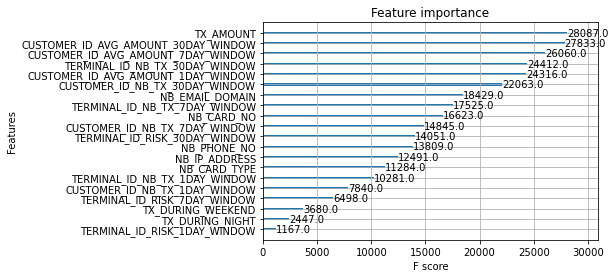

In [11]:
y_vld_pred = clf_best.predict(X_train.loc[idxV,cols])
y_vld_real = y_train.loc[idxV]
metrics_sklearn(y_vld_real, y_vld_pred)
feature_importance_selected(clf_best)

## Model Demonstration

In [12]:
# Test Dataset
X_test = X_train.loc[idxP,cols]
y_test = y_train.loc[idxP]

In [25]:
from random import sample

# Demo_normal = 1732038
Demo_normal = sample(y_test[y_test==0].index.to_list(),1)[0]
print('Demo_normal:',Demo_normal)

#Demo_fraud = 1620049
Demo_fraud = sample(y_test[y_test==1].index.to_list(),1)[0]
print('Demo_fraud:',Demo_fraud)

# Demo_pred_error = 1658330

Demo_normal: 1716812
Demo_fraud: 1757572


In [34]:
X_test.loc[[Demo_normal]]

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,NB_CARD_NO,NB_CARD_TYPE,NB_EMAIL_DOMAIN,NB_IP_ADDRESS,NB_PHONE_NO
1716812,9.09,0,0,1.0,9.09,4.0,9.8575,22.0,8.749545,3.0,0.0,23.0,0.043478,78.0,0.128205,7,5,11,1,3


In [35]:
X_test.loc[[1620049]]

,TX_AMOUNT,TX_DURING_WEEKEND,TX_DURING_NIGHT,CUSTOMER_ID_NB_TX_1DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,NB_CARD_NO,NB_CARD_TYPE,NB_EMAIL_DOMAIN,NB_IP_ADDRESS,NB_PHONE_NO
1620049,50.64,0,0,8.0,86.195,24.0,86.41375,63.0,91.882857,3.0,0.0,15.0,0.266667,73.0,0.150685,47,10,26,46,57


In [14]:
def demo(n):
    y_pred = clf_best.predict(X_test.loc[[n]])[0]
    y_pred_proba = clf_best.predict_proba(X_test.loc[[n]])[0][1]
    y_real = y_test[[n]].values[0]
    print('y_pred：', y_pred)
    print('y_real：', y_real)
    print('y_pred_proba：', y_pred_proba)
    return y_pred, y_real, y_pred_proba

In [15]:
def fraud_detection(y_pred, y_real, y_pred_proba):
    if y_test_pred == y_test_real:
        if y_test_pred == 0:
            if y_pred_proba < 0.3:
                print('The charge was authorized.')
            elif y_pred_proba < 0.5:
                print('We evaluated this charge as having elevated risk, and placed it in your manual review queue.')
        else:        
            print('Alert! We blocked this charge as too risky. \nWe reports payments as high risk when we believe they’re likely to be fraudulent. And the payments are blocked by default.')
    else:
        print('Sorry, something went wrong while evaluating this payment. We have been notified and we’ll look into this as soon as possible.')

In [26]:
y_test_pred, y_test_real, y_test_pred_proba = demo(Demo_fraud)

y_pred： 0
y_real： 1
y_pred_proba： 0.006826722


In [27]:
fraud_detection(y_test_pred, y_test_real, y_test_pred_proba)

Sorry, something went wrong while evaluating this payment. We have been notified and we’ll look into this as soon as possible.


In [28]:
y_test_pred

0